# Goal
- Analyze telecom user data to predict churn

In [5]:
%%javascript
$.getScript('http://asimjalis.github.io/ipyn-ext/js/ipyn-present.js')

<IPython.core.display.Javascript object>

# Read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import helper_tools

In [2]:
churn_df = pd.read_csv('data/churn.csv')
col_names = churn_df.columns.tolist()

print "Column names:"
print col_names

print "\nSample data:"
print np.shape(churn_df)
churn_df.head(6)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']

Sample data:
(3333, 21)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 572.9+ KB


- no NaN value

# Made dummies

In [4]:
col = ['State', 'Account Length', 'Area Code', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']
df1 = pd.get_dummies(churn_df[col])

In [5]:
print np.shape(df1)
print df1.columns
df1.head()

(3333, 73)
Index([u'Account Length', u'Area Code', u'VMail Message', u'Day Mins',
       u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge',
       u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins',
       u'Intl Calls', u'Intl Charge', u'CustServ Calls', u'State_AK',
       u'State_AL', u'State_AR', u'State_AZ', u'State_CA', u'State_CO',
       u'State_CT', u'State_DC', u'State_DE', u'State_FL', u'State_GA',
       u'State_HI', u'State_IA', u'State_ID', u'State_IL', u'State_IN',
       u'State_KS', u'State_KY', u'State_LA', u'State_MA', u'State_MD',
       u'State_ME', u'State_MI', u'State_MN', u'State_MO', u'State_MS',
       u'State_MT', u'State_NC', u'State_ND', u'State_NE', u'State_NH',
       u'State_NJ', u'State_NM', u'State_NV', u'State_NY', u'State_OH',
       u'State_OK', u'State_OR', u'State_PA', u'State_RI', u'State_SC',
       u'State_SD', u'State_TN', u'State_TX', u'State_UT', u'State_VA',
       u'State_VT', u'State_WA', u'State_WI', u'State

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,...,State_WA,State_WI,State_WV,State_WY,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes,Churn?_False.,Churn?_True.
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,1,0,0,1,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,1,0,0,1,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,1,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,1,1,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,1,1,0,1,0


In [6]:
# Removing a dummy from each original column to avoid multicollinearity
col1 = [u'Account Length', u'Area Code', u'VMail Message', u'Day Mins',
       u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge',
       u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins',
       u'Intl Calls', u'Intl Charge', u'CustServ Calls', u'State_AK',
       u'State_AL', u'State_AR', u'State_AZ', u'State_CA', u'State_CO',
       u'State_CT', u'State_DC', u'State_DE', u'State_FL', u'State_GA',
       u'State_HI', u'State_IA', u'State_ID', u'State_IL', u'State_IN',
       u'State_KS', u'State_KY', u'State_LA', u'State_MA', u'State_MD',
       u'State_ME', u'State_MI', u'State_MN', u'State_MO', u'State_MS',
       u'State_MT', u'State_NC', u'State_ND', u'State_NE', u'State_NH',
       u'State_NJ', u'State_NM', u'State_NV', u'State_NY', u'State_OH',
       u'State_OK', u'State_OR', u'State_PA', u'State_RI', u'State_SC',
       u'State_SD', u'State_TN', u'State_TX', u'State_UT', u'State_VA',
       u'State_VT', u'State_WA', u'State_WI', u'State_WV', 
       u"Int'l Plan_yes", u'VMail Plan_yes', u'Churn?_True.']

In [7]:
df1 = df1[col1] 
df1.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,Int'l Plan_yes,VMail Plan_yes,Churn?_True.
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,1,0,0


In [8]:
from sklearn.cross_validation import train_test_split

X, y = df1.iloc[:, 0:-1].values, df1.iloc[:, -1].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
from collections import Counter
print Counter(y)
print 483/(2850+483)

Counter({0.0: 2850, 1.0: 483})
0.144914491449


- Unbalanced data
    - Try SVM
    - Class weight with tree algorithms

# Feature selection

- I made a custom helper tools (helper_tools.py) to automate some data analysis processes. 
- The file is printed at the bottom of this Notebook

 1) Day Mins                       0.164537
 2) CustServ Calls                 0.106125
 3) Day Charge                     0.085468
 4) Eve Mins                       0.056238
 5) Int'l Plan_yes                 0.055822
 6) Eve Charge                     0.050309
 7) Intl Mins                      0.047967
 8) Intl Charge                    0.043443
 9) Intl Calls                     0.043129
10) Night Mins                     0.040516
11) Night Charge                   0.039717
12) VMail Message                  0.035208
13) Account Length                 0.034290
14) Night Calls                    0.033227
15) Day Calls                      0.032164
16) Eve Calls                      0.024249
17) Area Code                      0.007980
18) VMail Plan_yes                 0.005056
19) State_MD                       0.004833
20) State_SC                       0.004725
21) State_TX                       0.004213
22) State_MI                       0.003968
23) State_OK                    

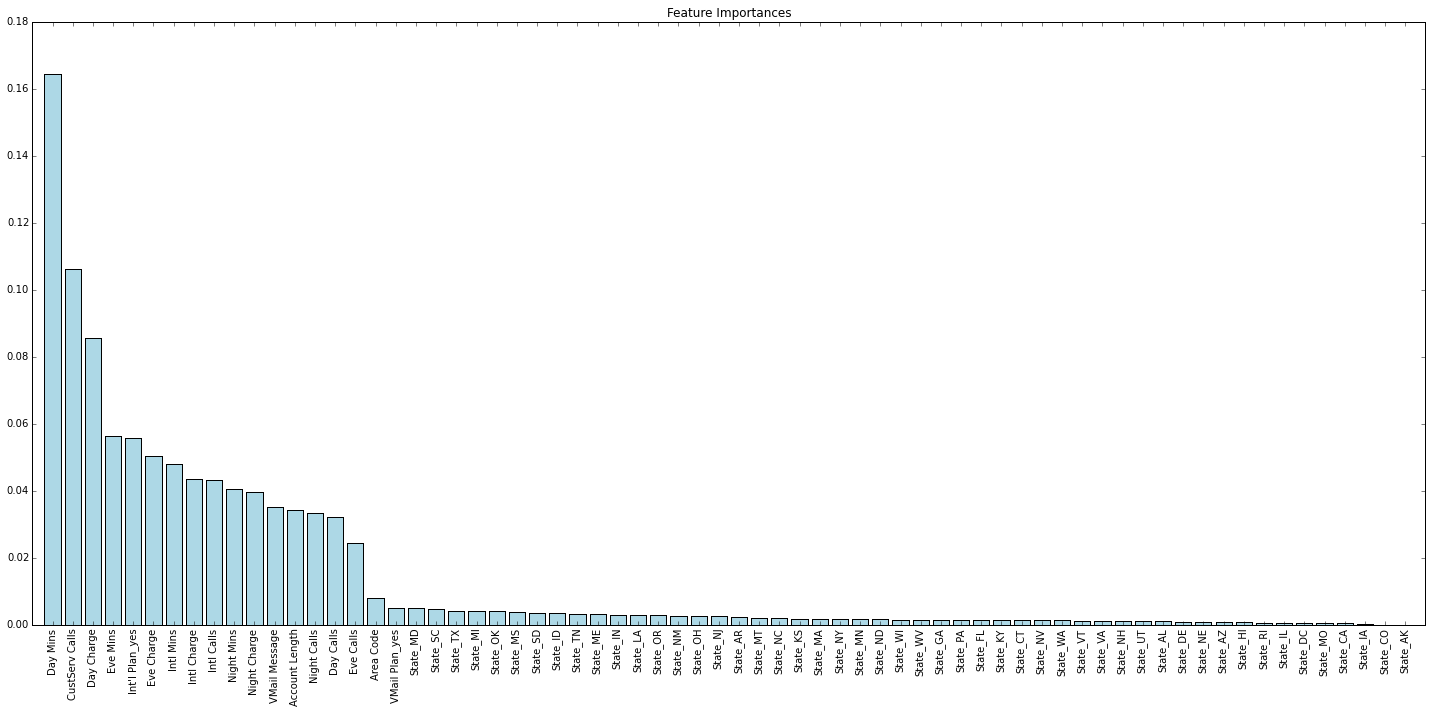

In [10]:
from sklearn.ensemble import RandomForestClassifier
helper_tools.forest_importance_plot(df1, X_train, y_train, RandomForestClassifier())

Optimal number of features : 18


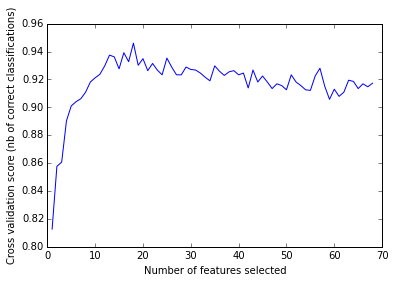

In [51]:
helper_tools.optimal_number_of_features_plot(RandomForestClassifier(), X_train, y_train)

- take out states

In [12]:
col2 = [u'Account Length', u'Area Code', u'VMail Message', u'Day Mins',
       u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge',
       u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins',
       u'Intl Calls', u'Intl Charge', u'CustServ Calls',
       u"Int'l Plan_yes", u'VMail Plan_yes', u'Churn?_True.']

In [13]:
df2 = df1[col2]
np.shape(df2)

(3333, 19)

In [14]:
X2, y2 = df2.iloc[:, 0:-1].values, df2.iloc[:, -1].values

X_train2, X_test2, y_train2, y_test2 = \
        train_test_split(X2, y2, test_size=0.3, random_state=0)

/Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


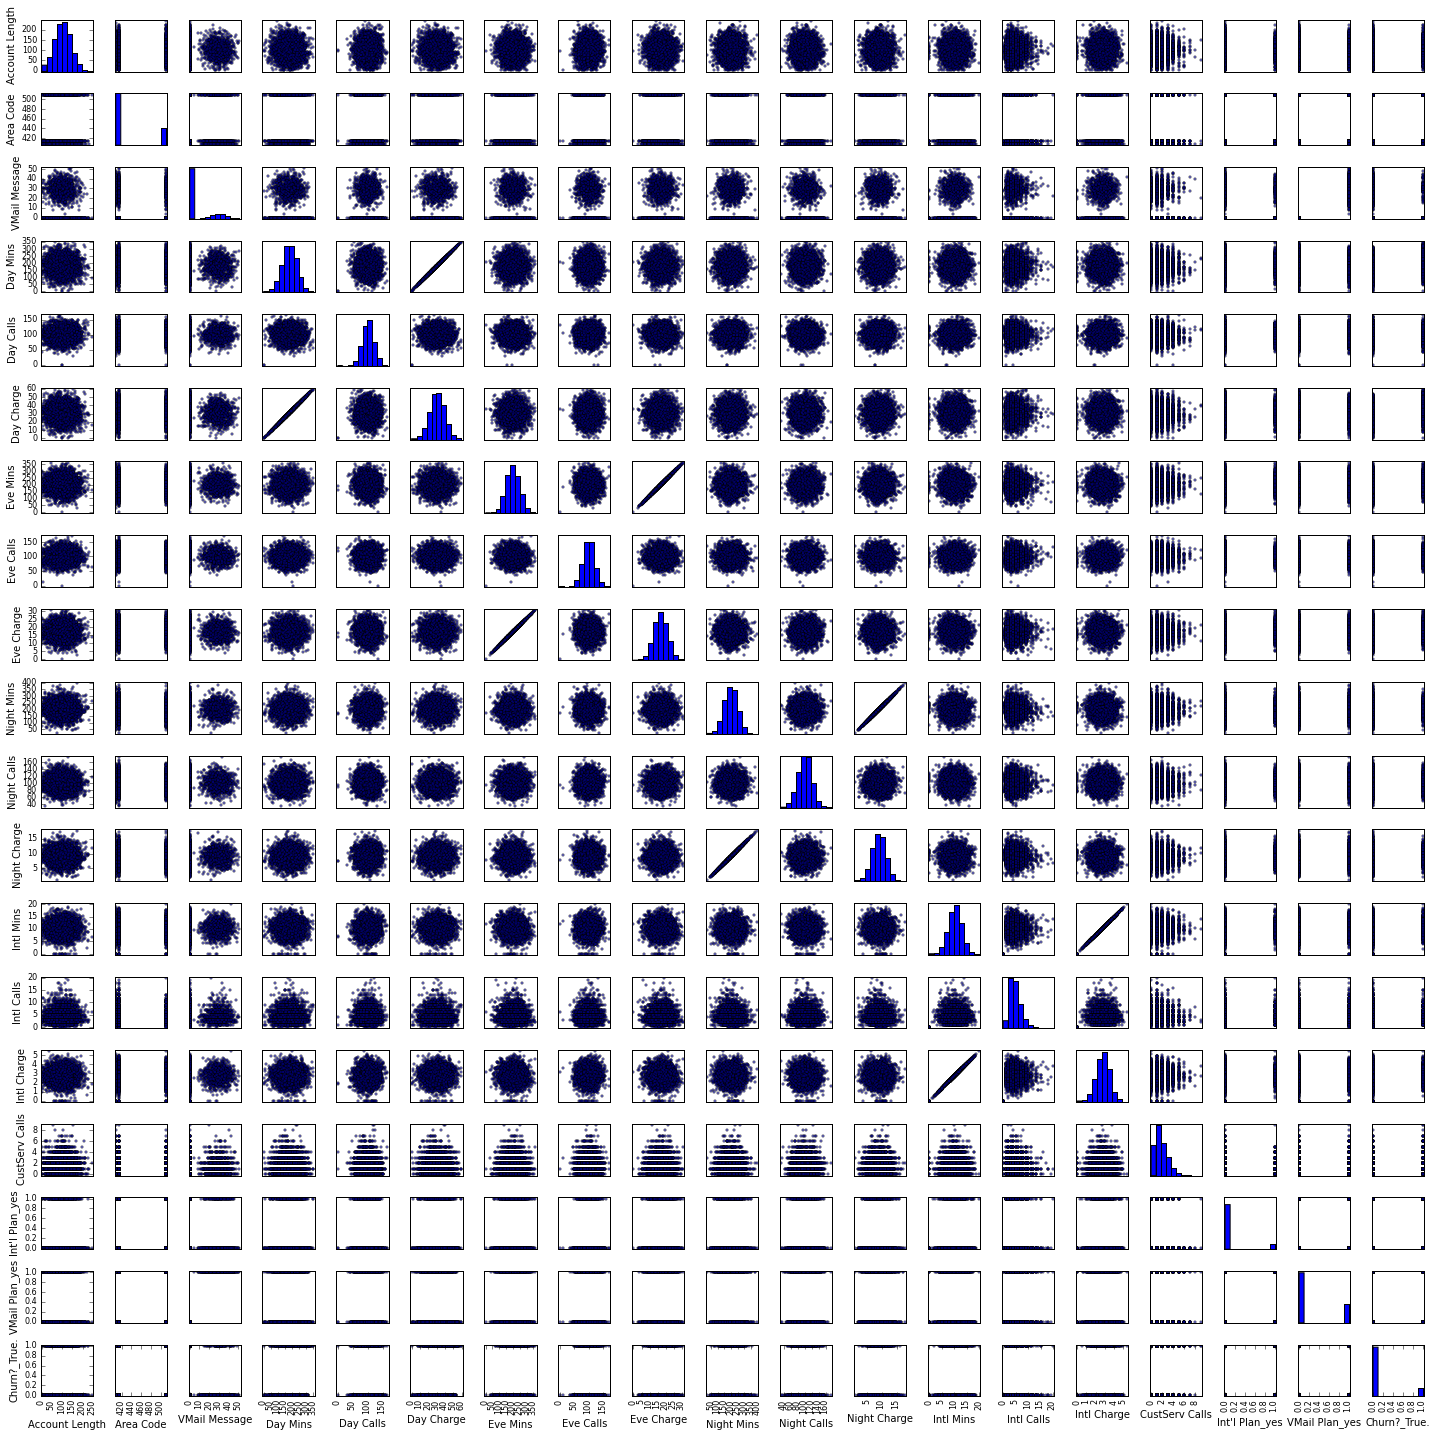

In [15]:
pd.scatter_matrix(df2, figsize=(20,20))
plt.tight_layout()
plt.show()

- most distributions are nomal
- there are high multicollinearity (min&charg. makes sense since number of minutes should directly relate to charge)
- change Vmail message 0 or 1
- area code is not dummy yet 

## See correlation between Charge and Mins

In [16]:
print np.corrcoef(df2['Day Charge'], df2['Day Mins'])
print np.corrcoef(df2['Eve Charge'], df2['Eve Mins'])
print np.corrcoef(df2['Night Charge'], df2['Night Mins'])
print np.corrcoef(df2['Intl Charge'], df2['Intl Mins'])

[[ 1.          0.99999995]
 [ 0.99999995  1.        ]]
[[ 1.          0.99999978]
 [ 0.99999978  1.        ]]
[[ 1.          0.99999921]
 [ 0.99999921  1.        ]]
[[ 1.          0.99999274]
 [ 0.99999274  1.        ]]


- highly correlated. Since it's very high correlation, I can take out either one. Take out Charge. 

In [17]:
col3 = [u'Account Length', u'Area Code', u'VMail Message', u'Day Mins',
       u'Day Calls', u'Eve Mins', u'Eve Calls', u'Night Mins', u'Night Calls', u'Intl Mins',
       u'Intl Calls', u'CustServ Calls',
       u"Int'l Plan_yes", u'VMail Plan_yes', u'Churn?_True.']

In [18]:
df3 = df1[col3]
np.shape(df3)

(3333, 15)

In [19]:
X3, y3 = df3.iloc[:, 0:-1].values, df3.iloc[:, -1].values

X_train3, X_test3, y_train3, y_test3 = \
        train_test_split(X3, y3, test_size=0.3, random_state=0)

In [20]:
df3.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Int'l Plan_yes,VMail Plan_yes,Churn?_True.
0,128,415,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,0
1,107,415,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1,0
2,137,415,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,0
3,84,408,0,299.4,71,61.9,88,196.9,89,6.6,7,2,1,0,0
4,75,415,0,166.7,113,148.3,122,186.9,121,10.1,3,3,1,0,0


## Make Area Code dummy variables

In [21]:
df4 = df3.copy()
df4.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Int'l Plan_yes,VMail Plan_yes,Churn?_True.
0,128,415,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,0
1,107,415,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1,0
2,137,415,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,0
3,84,408,0,299.4,71,61.9,88,196.9,89,6.6,7,2,1,0,0
4,75,415,0,166.7,113,148.3,122,186.9,121,10.1,3,3,1,0,0


In [22]:
area_code_df = pd.get_dummies(df4['Area Code'], prefix='AreaCode').drop('AreaCode_408', axis=1)
area_code_df.head()

,AreaCode_415,AreaCode_510
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0


In [23]:
print np.shape(df4), np.shape(area_code_df)

(3333, 15) (3333, 2)


In [24]:
df4 = pd.concat([area_code_df, df4.drop('Area Code', axis=1)], axis=1, join='inner')
print np.shape(df4)
df4.head()

(3333, 16)


,AreaCode_415,AreaCode_510,Account Length,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Int'l Plan_yes,VMail Plan_yes,Churn?_True.
0,1,0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,0
1,1,0,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1,0
2,1,0,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,0
3,0,0,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2,1,0,0
4,1,0,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,1,0,0


In [25]:
X4, y4 = df4.iloc[:, 0:-1].values, df4.iloc[:, -1].values

X_train4, X_test4, y_train4, y_test4 = \
        train_test_split(X4, y4, test_size=0.3, random_state=0)

## Transform VMail into 0 and 1

In [26]:
df5 = df4.copy()
df5.head()

,AreaCode_415,AreaCode_510,Account Length,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Int'l Plan_yes,VMail Plan_yes,Churn?_True.
0,1,0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,0
1,1,0,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1,0
2,1,0,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,0
3,0,0,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2,1,0,0
4,1,0,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,1,0,0


In [27]:
df5['VMail Message'] = df5['VMail Message'].apply(lambda x:1 if x!=0 else 0)

In [28]:
Counter(df5['VMail Message'])

Counter({0: 2411, 1: 922})

In [29]:
df5.tail()

,AreaCode_415,AreaCode_510,Account Length,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Int'l Plan_yes,VMail Plan_yes,Churn?_True.
3328,1,0,192,1,156.2,77,215.5,126,279.1,83,9.9,6,2,0,1,0
3329,1,0,68,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,0,0
3330,0,1,28,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,0,0
3331,0,1,184,0,213.8,105,159.6,84,139.2,137,5.0,10,2,1,0,0
3332,1,0,74,1,234.4,113,265.9,82,241.4,77,13.7,4,0,0,1,0


In [30]:
X5, y5 = df5.iloc[:, 0:-1].values, df5.iloc[:, -1].values

X_train5, X_test5, y_train5, y_test5 = \
        train_test_split(X5, y5, test_size=0.3, random_state=0)

# Feature Extraction

- standardize df1
- PCA
- visualize

In [31]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X3)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [32]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_std)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
len(pca.explained_variance_ratio_)

68

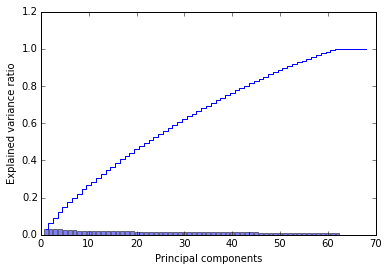

In [33]:
plt.bar(range(1, 69), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 69), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

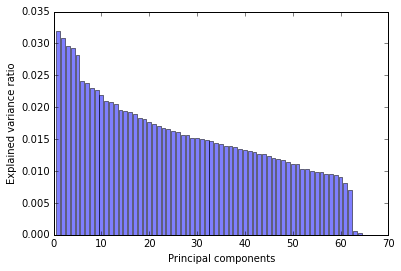

In [34]:
plt.bar(range(1, 69), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

- Stop here since each principal component have similar amount of information.

# Compare algorithms

- Test classifier algorithms
- Conceptually, SVC and Random forest and Decision tree with class-weight "balanced" handle unbalanced class well.

In [35]:
import time
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

Model type:  Logistic Regression
-----------------Cross validation scores----------------- 
 accuracy 0.859885634137 
 precision 0.57289409421 
 recall 0.16556122449 
 f1 0.252114252856 
 roc score 0.252114252856 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[846  16]
 [113  25]]

             precision    recall  f1-score   support

  not churn       0.88      0.98      0.93       862
      churn       0.61      0.18      0.28       138

avg / total       0.84      0.87      0.84      1000



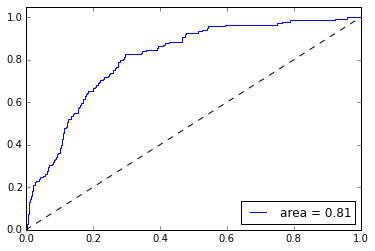

2.56919503212 seconds
+++++++++++++++++++++++++++++++++++++++++++
Model type:  Nearest Neighbors
-----------------Cross validation scores----------------- 
 accuracy 0.867679056302 
 precision 0.602827165954 
 recall 0.239880952381 
 f1 0.340113150885 
 roc score 0.340113150885 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[838  24]
 [106  32]]

             precision    recall  f1-score   support

  not churn       0.89      0.97      0.93       862
      churn       0.57      0.23      0.33       138

avg / total       0.84      0.87      0.85      1000



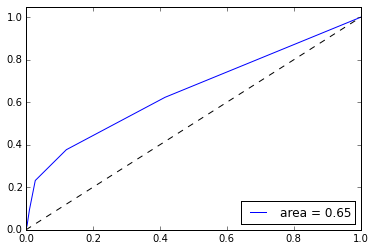

0.980576038361 seconds
+++++++++++++++++++++++++++++++++++++++++++
Model type:  Decision Tree
-----------------Cross validation scores----------------- 
 accuracy 0.909993526461 
 precision 0.715222428637 
 recall 0.72074829932 
 f1 0.702898125489 
 roc score 0.702898125489 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[797  65]
 [ 32 106]]

             precision    recall  f1-score   support

  not churn       0.96      0.92      0.94       862
      churn       0.62      0.77      0.69       138

avg / total       0.91      0.90      0.91      1000



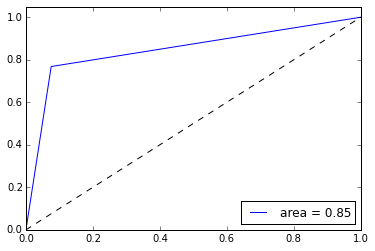

1.66759395599 seconds
+++++++++++++++++++++++++++++++++++++++++++
Model type:  Decision Tree Balanced
-----------------Cross validation scores----------------- 
 accuracy 0.919293844743 
 precision 0.718385034204 
 recall 0.726743197279 
 f1 0.715486589835 
 roc score 0.715486589835 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[807  55]
 [ 37 101]]

             precision    recall  f1-score   support

  not churn       0.96      0.94      0.95       862
      churn       0.65      0.73      0.69       138

avg / total       0.91      0.91      0.91      1000



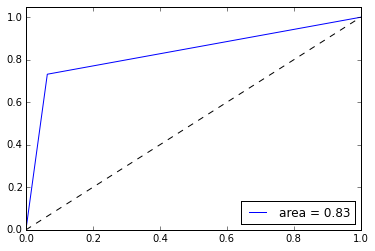

1.36928582191 seconds
+++++++++++++++++++++++++++++++++++++++++++
Model type:  Random Forest
-----------------Cross validation scores----------------- 
 accuracy 0.92889266512 
 precision 0.935378219169 
 recall 0.579634353741 
 f1 0.710482266751 
 roc score 0.710482266751 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[850  12]
 [ 53  85]]

             precision    recall  f1-score   support

  not churn       0.94      0.99      0.96       862
      churn       0.88      0.62      0.72       138

avg / total       0.93      0.94      0.93      1000



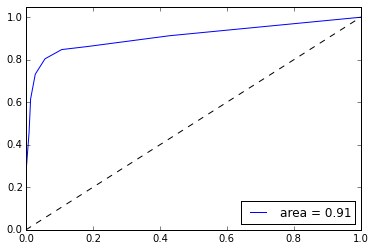

3.09052109718 seconds
+++++++++++++++++++++++++++++++++++++++++++
Model type:  Random Forest Balanced
-----------------Cross validation scores----------------- 
 accuracy 0.918695042348 
 precision 0.928530736211 
 recall 0.477933673469 
 f1 0.662320095197 
 roc score 0.662320095197 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[851  11]
 [ 64  74]]

             precision    recall  f1-score   support

  not churn       0.93      0.99      0.96       862
      churn       0.87      0.54      0.66       138

avg / total       0.92      0.93      0.92      1000



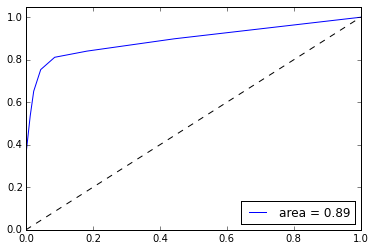

3.16827702522 seconds
+++++++++++++++++++++++++++++++++++++++++++
Model type:  AdaBoost
-----------------Cross validation scores----------------- 
 accuracy 0.875789861718 
 precision 0.62253032169 
 recall 0.356207482993 
 f1 0.45138602988 
 roc score 0.45138602988 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[826  36]
 [ 89  49]]

             precision    recall  f1-score   support

  not churn       0.90      0.96      0.93       862
      churn       0.58      0.36      0.44       138

avg / total       0.86      0.88      0.86      1000



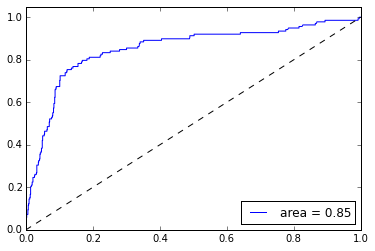

12.5609400272 seconds
+++++++++++++++++++++++++++++++++++++++++++
Model type:  Gradient Boosting
-----------------Cross validation scores----------------- 
 accuracy 0.949302296308 
 precision 0.912317128858 
 recall 0.718537414966 
 f1 0.802710283119 
 roc score 0.802710283119 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[845  17]
 [ 32 106]]

             precision    recall  f1-score   support

  not churn       0.96      0.98      0.97       862
      churn       0.86      0.77      0.81       138

avg / total       0.95      0.95      0.95      1000



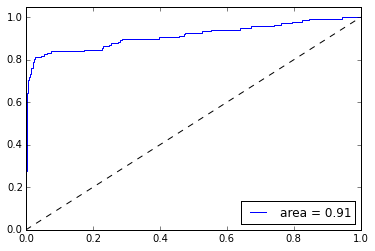

25.8438169956 seconds
+++++++++++++++++++++++++++++++++++++++++++
Model type:  Naive Bayes
-----------------Cross validation scores----------------- 
 accuracy 0.854181726637 
 precision 0.496531027708 
 recall 0.432355442177 
 f1 0.460861279269 
 roc score 0.460861279269 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[787  75]
 [ 79  59]]

             precision    recall  f1-score   support

  not churn       0.91      0.91      0.91       862
      churn       0.44      0.43      0.43       138

avg / total       0.84      0.85      0.85      1000



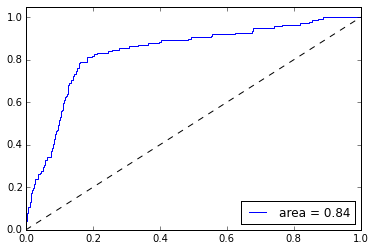

/Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.260311841965 seconds
+++++++++++++++++++++++++++++++++++++++++++
Model type:  SVM
-----------------Cross validation scores----------------- 
 accuracy 0.855087123051 
 precision 0.0 
 recall 0.0 
 f1 0.0 
 roc score 0.0 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[862   0]
 [138   0]]

             precision    recall  f1-score   support

  not churn       0.86      1.00      0.93       862
      churn       0.00      0.00      0.00       138

avg / total       0.74      0.86      0.80      1000

ROC curve: predict_proba is not available for the model 

30.0783798695 seconds
+++++++++++++++++++++++++++++++++++++++++++


/Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
names = ["Logistic Regression", "Nearest Neighbors", "Decision Tree", "Decision Tree Balanced",
         "Random Forest", "Random Forest Balanced", "AdaBoost", "Gradient Boosting","Naive Bayes", 
         "SVM"
        ]

n_estimators = 10
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    DecisionTreeClassifier(class_weight='balanced'),    
    RandomForestClassifier(),
    RandomForestClassifier(class_weight='balanced'),    
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    SVC()
]

for name, clf in zip(names, classifiers):
    start = time.time()
    print "Model type: ", name
    helper_tools.run_performance(clf, X5, y5, X_train5, y_train5, X_test5, y_test5)
    end = time.time()
    print end - start, 'seconds'
    print '+++++++++++++++++++++++++++++++++++++++++++'

# Compare algoriths with standardized features

In [39]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X5_std = stdsc.fit_transform(X5)
X_train5_std = stdsc.fit_transform(X_train5)
X_test5_std = stdsc.transform(X_test5)

Model type:  Logistic Regression
-----------------Cross validation scores----------------- 
 accuracy 0.861982341623 
 precision 0.567030828648 
 recall 0.215136054422 
 f1 0.310041112893 
 roc score 0.310041112893 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[839  23]
 [111  27]]

             precision    recall  f1-score   support

  not churn       0.88      0.97      0.93       862
      churn       0.54      0.20      0.29       138

avg / total       0.84      0.87      0.84      1000



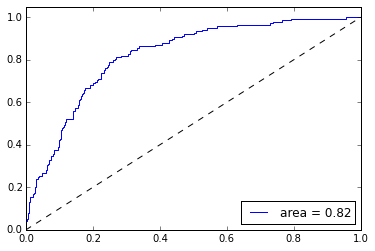

Model type:  Nearest Neighbors
-----------------Cross validation scores----------------- 
 accuracy 0.878794662926 
 precision 0.738256949878 
 recall 0.252763605442 
 f1 0.375182831707 
 roc score 0.375182831707 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[849  13]
 [ 99  39]]

             precision    recall  f1-score   support

  not churn       0.90      0.98      0.94       862
      churn       0.75      0.28      0.41       138

avg / total       0.88      0.89      0.87      1000



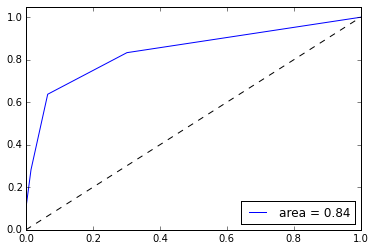

Model type:  Decision Tree
-----------------Cross validation scores----------------- 
 accuracy 0.917792343241 
 precision 0.690520825307 
 recall 0.714455782313 
 f1 0.703307846785 
 roc score 0.703307846785 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[806  56]
 [ 33 105]]

             precision    recall  f1-score   support

  not churn       0.96      0.94      0.95       862
      churn       0.65      0.76      0.70       138

avg / total       0.92      0.91      0.91      1000



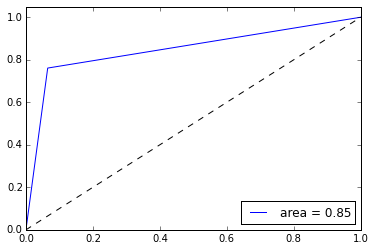

Model type:  Decision Tree Balanced
-----------------Cross validation scores----------------- 
 accuracy 0.919898041754 
 precision 0.71232568524 
 recall 0.724659863946 
 f1 0.710912236515 
 roc score 0.710912236515 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[805  57]
 [ 37 101]]

             precision    recall  f1-score   support

  not churn       0.96      0.93      0.94       862
      churn       0.64      0.73      0.68       138

avg / total       0.91      0.91      0.91      1000



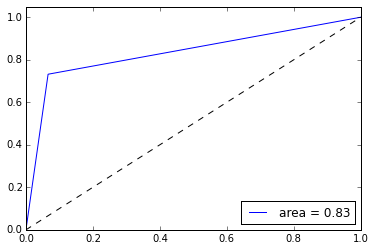

Model type:  Random Forest
-----------------Cross validation scores----------------- 
 accuracy 0.930099260938 
 precision 0.924810391376 
 recall 0.554634353741 
 f1 0.678806422483 
 roc score 0.678806422483 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[850  12]
 [ 46  92]]

             precision    recall  f1-score   support

  not churn       0.95      0.99      0.97       862
      churn       0.88      0.67      0.76       138

avg / total       0.94      0.94      0.94      1000



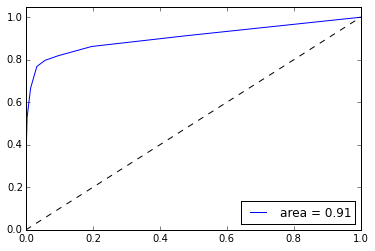

Model type:  Random Forest Balanced
-----------------Cross validation scores----------------- 
 accuracy 0.918696840553 
 precision 0.93083905877 
 recall 0.492431972789 
 f1 0.630816459454 
 roc score 0.630816459454 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[845  17]
 [ 69  69]]

             precision    recall  f1-score   support

  not churn       0.92      0.98      0.95       862
      churn       0.80      0.50      0.62       138

avg / total       0.91      0.91      0.91      1000



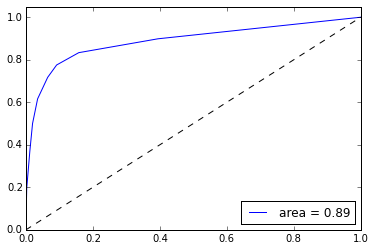

Model type:  AdaBoost
-----------------Cross validation scores----------------- 
 accuracy 0.875789861718 
 precision 0.62253032169 
 recall 0.356207482993 
 f1 0.45138602988 
 roc score 0.45138602988 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[826  36]
 [ 89  49]]

             precision    recall  f1-score   support

  not churn       0.90      0.96      0.93       862
      churn       0.58      0.36      0.44       138

avg / total       0.86      0.88      0.86      1000



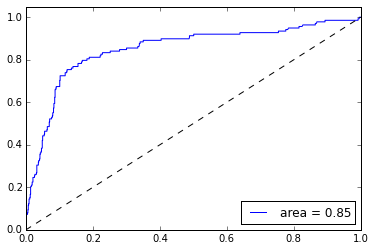

Model type:  Gradient Boosting
-----------------Cross validation scores----------------- 
 accuracy 0.949301397206 
 precision 0.914512250809 
 recall 0.716454081633 
 f1 0.803725200718 
 roc score 0.803725200718 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[845  17]
 [ 32 106]]

             precision    recall  f1-score   support

  not churn       0.96      0.98      0.97       862
      churn       0.86      0.77      0.81       138

avg / total       0.95      0.95      0.95      1000



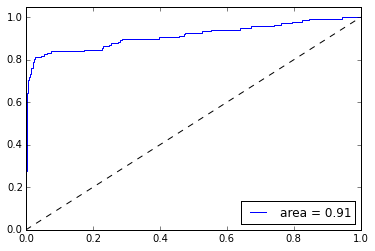

Model type:  Naive Bayes
-----------------Cross validation scores----------------- 
 accuracy 0.854181726637 
 precision 0.496531027708 
 recall 0.432355442177 
 f1 0.460861279269 
 roc score 0.460861279269 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[787  75]
 [ 79  59]]

             precision    recall  f1-score   support

  not churn       0.91      0.91      0.91       862
      churn       0.44      0.43      0.43       138

avg / total       0.84      0.85      0.85      1000



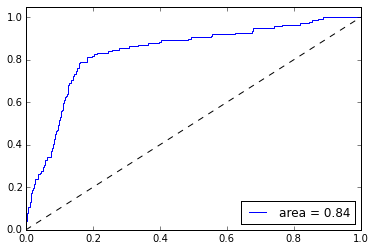

Model type:  SVM
-----------------Cross validation scores----------------- 
 accuracy 0.912696229163 
 precision 0.871841816338 
 recall 0.467942176871 
 f1 0.606125073188 
 roc score 0.606125073188 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[851  11]
 [ 73  65]]

             precision    recall  f1-score   support

  not churn       0.92      0.99      0.95       862
      churn       0.86      0.47      0.61       138

avg / total       0.91      0.92      0.91      1000

ROC curve: predict_proba is not available for the model 



In [40]:
for name, clf in zip(names, classifiers):
    print "Model type: ", name
    helper_tools.run_performance(clf, X5_std, y5, X_train5_std, y_train5, X_test5_std, y_test5)

# Voting classifier

- Use random forest and gradient boosting to vote

In [41]:
from sklearn.ensemble import VotingClassifier

-----------------Cross validation scores----------------- 
 accuracy 0.950502598407 
 precision 0.926008100889 
 recall 0.716454081633 
 f1 0.805482721588 
 roc score 0.805482721588 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[846  16]
 [ 32 106]]

             precision    recall  f1-score   support

  not churn       0.96      0.98      0.97       862
      churn       0.87      0.77      0.82       138

avg / total       0.95      0.95      0.95      1000



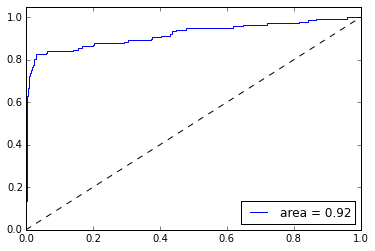

In [44]:
rf =  RandomForestClassifier(n_jobs=-1)
gb = GradientBoostingClassifier()

vc = VotingClassifier(estimators=[('rf', rf), ('gb', gb)],
                        voting='soft',
                        weights=[1,3])

helper_tools.run_performance(vc, X5, y5, X_train5, y_train5, X_test5, y_test5)

# Fitting test

## Diagnosing bias and variance problems with learning curves

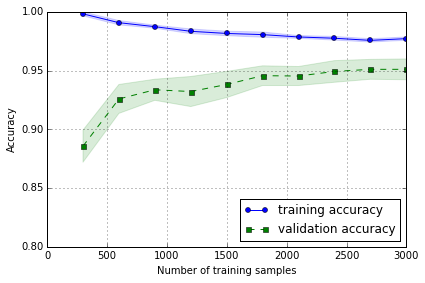

In [45]:
helper_tools.learning_curve_plot(vc, X5, y5)

- relatively low variance and bias

# Tuning

In [46]:
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint
from scipy.stats import expon
from sklearn.grid_search import RandomizedSearchCV
from sklearn.datasets import load_digits

# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

# specify parameters and distributions to sample from
param_dist = {
    "rf__n_estimators": sp_randint(100, 10000),    
    "rf__max_depth": [3, None],
    "rf__max_features": sp_randint(1, 11),
    "rf__min_samples_split": sp_randint(1, 11),
    "rf__min_samples_leaf": sp_randint(1, 11),
    "rf__bootstrap": [True, False],
    "rf__criterion": ["gini", "entropy"],
    "rf__warm_start": ["True", "False"],    
    "rf__class_weight": [None, "balanced", "balanced_subsample"],    
    "gb__loss": ["deviance", "exponential"],
    "gb__learning_rate": expon(),
    "gb__n_estimators": sp_randint(100, 10000),
    "gb__max_features": sp_randint(1, 11),
    "gb__min_samples_split": sp_randint(1, 11),
    "gb__min_samples_leaf": sp_randint(1, 11),    
    "gb__max_depth": [3, None],
    "gb__warm_start": ["True", "False"]
    }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(vc, param_distributions=param_dist,
                                   n_iter=n_iter_search, n_jobs=-1)

start = time()
random_search.fit(X5, y5)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

RandomizedSearchCV took 1272.76 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.954 (std: 0.006)
Parameters: {'gb__learning_rate': 0.3175974111166098, 'rf__max_depth': 3, 'gb__n_estimators': 4798, 'gb__max_depth': None, 'rf__bootstrap': True, 'gb__max_features': 5, 'rf__criterion': 'gini', 'gb__warm_start': 'True', 'rf__max_features': 4, 'gb__min_samples_split': 6, 'rf__min_samples_split': 3, 'gb__min_samples_leaf': 5, 'gb__loss': 'exponential', 'rf__min_samples_leaf': 8, 'rf__warm_start': 'False', 'rf__n_estimators': 6070, 'rf__class_weight': 'balanced_subsample'}

Model with rank: 2
Mean validation score: 0.953 (std: 0.003)
Parameters: {'gb__learning_rate': 0.2918173741761145, 'rf__max_depth': 3, 'gb__n_estimators': 4443, 'gb__max_depth': 3, 'rf__bootstrap': False, 'gb__max_features': 6, 'rf__criterion': 'gini', 'gb__warm_start': 'False', 'rf__max_features': 3, 'gb__min_samples_split': 10, 'rf__min_samples_split': 10, 'gb__min_samples_leaf': 

/Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training s

# Final model

Parameters: {'gb__learning_rate': 0.3175974111166098, 'rf__max_depth': 3, 'gb__n_estimators': 4798, 'gb__max_depth': None, 'rf__bootstrap': True, 'gb__max_features': 5, 'rf__criterion': 'gini', 'gb__warm_start': 'True', 'rf__max_features': 4, 'gb__min_samples_split': 6, 'rf__min_samples_split': 3, 'gb__min_samples_leaf': 5, 'gb__loss': 'exponential', 'rf__min_samples_leaf': 8, 'rf__warm_start': 'False', 'rf__n_estimators': 6070, 'rf__class_weight': 'balanced_subsample'}

-----------------Cross validation scores----------------- 
 accuracy 0.955297513082 
 precision 0.906764579768 
 recall 0.743239795918 
 f1 0.824656127015 
 roc score 0.824656127015 

-----------------Non cross validation scores using test data-----------------
Confution matrix 
[[852  10]
 [ 34 104]]

             precision    recall  f1-score   support

  not churn       0.96      0.99      0.97       862
      churn       0.91      0.75      0.83       138

avg / total       0.95      0.96      0.95      1000



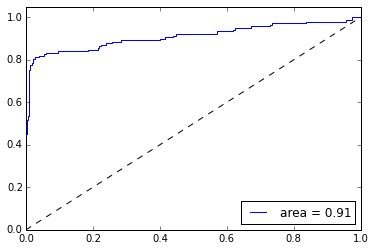

1929.38776088 seconds


In [49]:
rf2 = RandomForestClassifier(n_jobs=-1, max_depth=3, bootstrap=True, criterion='gini', max_features=4, min_samples_split=3,
                              min_samples_leaf=8, warm_start=False, n_estimators = 6070, class_weight='balanced_subsample' )

gb2 = GradientBoostingClassifier(learning_rate= 0.3175974111166098, n_estimators=4798, max_depth=None, max_features=5, warm_start=True, 
                                 min_samples_split=6, min_samples_leaf=5, loss='exponential')

vc2 = VotingClassifier(estimators=[('rf2', rf2), ('gb2', gb2)],
                        voting='soft',
                        weights=[1,2])

start = time()
helper_tools.run_performance(vc2, X5, y5, X_train5, y_train5, X_test5, y_test5)
end = time()
print end - start, 'seconds'

# helper_tools.py

In [50]:
!cat helper_tools.py

import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.learning_curve import validation_curve



def forest_importance_plot(data_frame, train_x, train_y, clf_class=RandomForestClassifier()):
    """
    returns feature importance ranking plot.
    data_frame = pandas dataframe
    clf_class = algorithms that have feature_importances_ are usable. Example: RandomForestClassifier()

    """
    feat_labels = data_frame.columns[:-1]

    forest = clf_class

    forest.fit(train_x, train_y)
    importances = forest.feature_importances_

    indices = np.argsort(importances)[::-1]

    for f in range